In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plots theme
plt.style.use('seaborn-paper')

# Analyzing Corpora Text

To Do:
1. add a hist plot for sentence lenghts for each corpus.
2. add a hist plot for word counts for each corpus.

#### Generating vocabulary count and word frequencies from corpora text

imdb

In [25]:
!wc -w  'data/corpus/imdb-100k-cleaned.txt' # no. words
!wc -c 'data/corpus/imdb-100k-cleaned.txt' # no. chars

 23573192 data/corpus/imdb-100k-cleaned.txt
 125882839 data/corpus/imdb-100k-cleaned.txt


In [18]:
!/Users/Aziz/Downloads/glove/build/vocab_count -min-count 5 < 'data/corpus/imdb-100k-cleaned.txt' > data/imdb-vocab.txt

```
Processed 23573192 tokens.
Counted 144841 unique words.
Truncating vocabulary at min count 5.
Using vocabulary of size 53199.
```

imdb-text8

In [27]:
!wc -w  'data/corpus/imdb-text8.txt' # no. words
!wc -c 'data/corpus/imdb-text8.txt' # no. chars

 40578399 data/corpus/imdb-text8.txt
 225882839 data/corpus/imdb-text8.txt


In [23]:
!/Users/Aziz/Downloads/glove/build/vocab_count -min-count 5 < 'data/corpus/imdb-text8.txt' > data/imdb-text8-vocab.txt

```
Processed 40578399 tokens.
Counted 322737 unique words.
Truncating vocabulary at min count 5.
Using vocabulary of size 94123.
```

text8

In [26]:
!wc -w  'data/corpus/text8' # no. words
!wc -c 'data/corpus/text8' # no. chars

 17005207 data/corpus/text8
 100000000 data/corpus/text8


In [22]:
!/Users/Aziz/Downloads/glove/build/vocab_count -min-count 5 < 'data/corpus/text8' > data/text8-vocab.txt

```
Processed 17005207 tokens.
Counted 253854 unique words.
Truncating vocabulary at min count 5.
Using vocabulary of size 71290.
```

Dump to file

In [2]:
import pandas as pd
df_stat = pd.read_csv("data/stats-pd.txt", sep="|")#, index_col=1)
df_stat = df_stat.drop(df_stat.columns[0], axis=1)
df_stat = df_stat.drop(df_stat.columns[-1], axis=1)
df_stat = df_stat.drop(df_stat.index[0], axis=0)
df_stat = df_stat.astype(float)
df_stat = df_stat.T.copy()
cols = ['imdb', 'imdbtext8', 'text8', 'google']
df_stat.columns = cols
df_stat.T

,train_char,train_word,train_unique,embed_vocab,embed_acc
imdb,125882839,23573192,144841,53195,33.41
imdbtext8,225882839,40578399,322737,94158,59.89
text8,100000000,17005207,253854,71291,53.60
google,300000000,100000000,400000,3000000,76.85


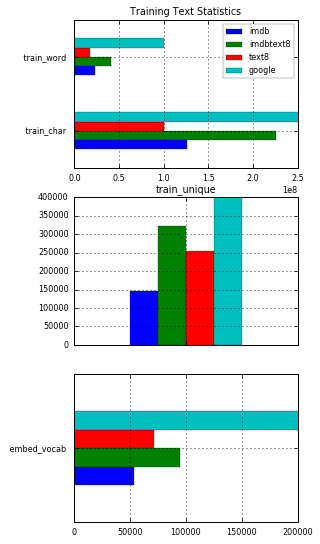

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4,9))
a = df_stat[:2].plot.barh(ax=axes[0], legend=0, grid=1);a.set_xlim((0,2.5e8));a.set_title('Training Text Statistics')
b = df_stat[2:3].plot.bar(ax=axes[1],legend=0, grid=1);b.set_ylim((10,4e5));b.set_title('train_unique');b.set_xticklabels('')
c = df_stat[3:4].plot.barh(ax=axes[2], legend=0, grid=1);c.set_xlim((0,2e5))
c.legend(bbox_to_anchor=((1,3.4)), fontsize=8)
# fig.savefig('../w2v-eval/img/cp-stats.png', dpi=300, bbox_inches='tight')

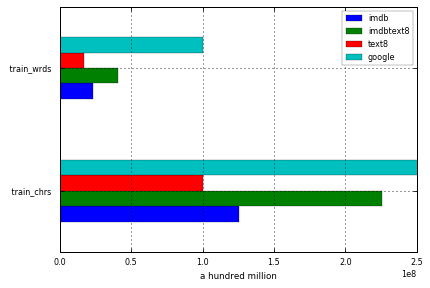

In [139]:
a = df_stat[:2].plot.barh(grid=1)
a.set_xlim((0,2.5e8))
a.set_xlabel('a hundred million')
plt.savefig('../w2v-eval/img/cp-stats1.png', dpi=300, bbox_inches='tight')

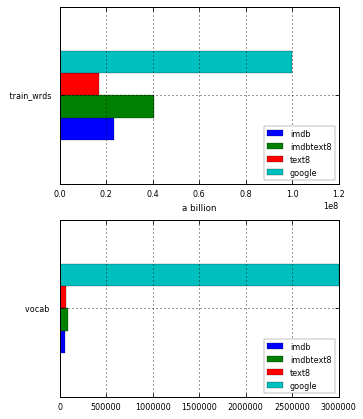

In [135]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
a = df_stat[1:2].plot.barh(ax=axes[0],grid=1)
a.set_xlim((0,1.2e8))
a.set_xlabel('a billion')

b = df_stat[2:3].plot.barh(ax=axes[1], grid=1)
# plt.savefig('../w2v-eval/img/cp-stats2.png', dpi=300, bbox_inches='tight')

In [89]:
voca_imdb = open('data/imdb-vocab.txt', 'r').readlines()
word_count = []
for line in voca_imdb:
    word, count = line.split()
    word_count.append((word, count))

In [95]:
for w, c in word_count[:10]: print w, c,' ',

the 1345417   and 654138   a 650985   of 583143   to 539427   is 425331   it 381961   in 375469   i 345083   this 300789  


In [190]:
len(word_count)

53199

### Word and Letters Frequencies

In [8]:
FILE_imdb = 'data/corpus/imdb-100k-cleaned.txt'
FILE_text8 = 'data/corpus/text8'
FILE_db8 = 'data/corpus/imdb-text8.txt'

In [21]:
# TEXT_imdb = open(FILE_imdb, 'r').read()
# TEXT_text8 = open(FILE_text8, 'r').read()
# TEXT_db8 = open(FILE_db8, 'r').read()

In [26]:
len([c for w,c in WORDS_imdb.items() if c >= 5])

53199

In [23]:
WORDS_text8 = Counter(TEXT_text8.split())
len(WORDS_text8)

253854

In [24]:
WORDS_db8 = Counter(TEXT_db8.split())
len(WORDS_db8)

322737

http://nbviewer.jupyter.org/url/norvig.com/ipython/How%20to%20Do%20Things%20with%20Words.ipynb

In [26]:
import re

In [25]:
def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower())

In [28]:
WORDS_imdb['the'], WORDS_db8['the'], WORDS_text8['the']

(1345417, 2406813, 1061396)

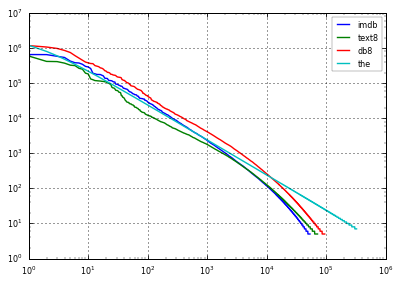

In [29]:
M = WORDS_db8['the']
plt.yscale('log');plt.xscale('log');
plt.plot([c for w, c in WORDS_imdb.most_common() if c >= 5])
plt.plot([c for w, c in WORDS_text8.most_common() if c >= 5])
plt.plot([c for w, c in WORDS_db8.most_common() if c >= 5])
plt.plot([M/i for i in range(1,len(WORDS_db8)+1)])
plt.grid();plt.legend(['imdb','text8','db8', 'the'])

**convert word counts to DataFrame**

In [78]:
# dataframe
df_WRD_imdb = pd.DataFrame.from_dict(WORDS_imdb.items())
df_WRD_imdb.columns = ['word','count']
df_WRD_imdb = df_WRD_imdb.sort_values('count', ascending=False)
df_WRD_imdb = df_WRD_imdb[df_WRD_imdb['count'] >= 5]
df_WRD_imdb.shape

(53199, 2)

In [79]:
# dataframe
df_WRD_t8 = pd.DataFrame.from_dict(WORDS_text8.items())
df_WRD_t8.columns = ['word','count']
df_WRD_t8 = df_WRD_t8.sort_values('count', ascending=False)
df_WRD_t8 = df_WRD_t8[df_WRD_t8['count'] >= 5]
df_WRD_t8.shape

(71290, 2)

In [80]:
# dataframe
df_WRD_db8 = pd.DataFrame.from_dict(WORDS_db8.items())
df_WRD_db8.columns = ['word','count']
df_WRD_db8 = df_WRD_db8.sort_values('count', ascending=False) # order dataframe by count 
df_WRD_db8 = df_WRD_db8[df_WRD_db8['count'] >= 5]
df_WRD_db8.shape

(94123, 2)

**convert char counts to DataFrames**

In [86]:
# dataframe
df_CHR_imdb = pd.DataFrame.from_dict(CHR_imdb.items())
df_CHR_imdb.columns = ['char', 'count']
df_CHR_imdb = df_CHR_imdb.sort_values('count', ascending=0)

In [33]:
# dataframe
df_CHR_t8 = pd.DataFrame.from_dict(CHR_text8.items())
df_CHR_t8.columns = ['char', 'count']
df_CHR_t8 = df_CHR_t8.sort_values('count', ascending=0)

In [87]:
# dataframe
df_CHR_db8 = pd.DataFrame.from_dict(CHR_db8.items())
df_CHR_db8.columns = ['char', 'count']
df_CHR_db8 = df_CHR_db8.sort_values('count', ascending=0)

**Save to csv files**

In [81]:
df_WRD_imdb.to_csv('data/corpus/stats/WRD-imdb.csv', index=0)

In [82]:
df_WRD_t8.to_csv('data/corpus/stats/WRD-text8.csv', index=0)

In [83]:
df_WRD_db8.to_csv('data/corpus/stats/WRD-imdbtext8.csv', index=0)

charcater counts to csv

In [88]:
df_CHR_imdb.to_csv('data/corpus/stats/CHR-imdb.csv', index=0)
df_CHR_t8.to_csv('data/corpus/stats/CHR-text8.csv', index=0)
df_CHR_db8.to_csv('data/corpus/stats/CHR-imdbtext8.csv', index=0)

# Read coprora stats from csv

In [284]:
df_WRD_imdb = pd.read_csv('data/corpus/stats/WRD-imdb.csv')
df_WRD_db8 = pd.read_csv('data/corpus/stats/WRD-imdbtext8.csv')
df_WRD_t8 = pd.read_csv('data/corpus/stats/WRD-text8.csv')

In [322]:
df_CHR_imdb = pd.read_csv('data/corpus/stats/CHR-imdb.csv')
df_CHR_db8 = pd.read_csv('data/corpus/stats/CHR-imdbtext8.csv')
df_CHR_t8 = pd.read_csv('data/corpus/stats/CHR-text8.csv')

### Letters Frequency:

In [32]:
def plot_char_frequency(char_count, title='Letters Usage', lim=2.5e7):
    try:
        del char_count[' ']
    except KeyError:
        pass
    plt.plot(char_count.values())
    plt.xticks(range(len(char_count.keys())), char_count.keys())
    plt.title(title)
    plt.ylim((0,lim))
    plt.grid()

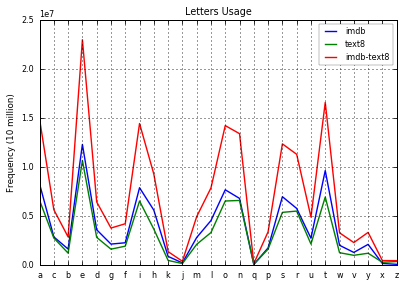

In [32]:
plot_char_frequency(CHR_imdb)
plot_char_frequency(CHR_text8)
plot_char_frequency(CHR_db8)
plt.legend(['imdb', 'text8', 'imdb-text8'])
plt.ylabel('Frequency (10 million)')
# plt.savefig('../w2v-eval/img/cp-letter-freq.png', dpi=300, bbox_inches='tight')

In [23]:
import requests
TEXT_shk =  requests.get('http://norvig.com/ngrams/shakespeare.txt').text

In [27]:
TOKENS_shk = tokens(TEXT_shk) # small char words

In [28]:
TEXT_shk = ' '.join(TOKENS_shk) # back to cleaned text

In [30]:
from collections import Counter
WORDS_shk = Counter(TEXT_shk.split())
len(WORDS_shk)

22987

In [31]:
CHR_shk = Counter(TEXT_shk)
len(CHR_shk)

27

In [53]:
# save clean shk text to file
open('data/corpus/shakespeare-clean.txt', 'w').write(TEXT_shk)

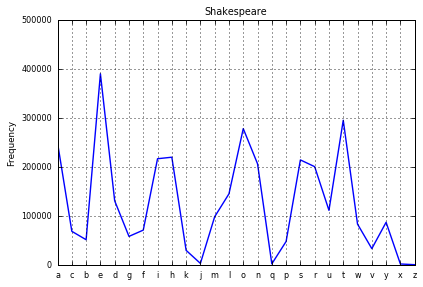

In [48]:
plot_char_frequency(CHR_shk, title='Shakespeare', lim=.5e6)
plt.ylabel('Frequency')

In [45]:
# dataframe
df_WRD_shk = pd.DataFrame.from_dict(WORDS_shk.items())
df_WRD_shk.columns = ['word','count']
df_WRD_shk = df_WRD_shk.sort_values('count', ascending=False)
df_WRD_shk = df_WRD_shk[df_WRD_shk['count'] >= 5]
df_WRD_shk.shape

(8070, 2)

In [54]:
# dataframe
df_CHR_shk = pd.DataFrame.from_dict(CHR_shk.items())
df_CHR_shk.columns = ['char', 'count']
df_CHR_shk = df_CHR_shk.sort_values('count', ascending=0)
df_CHR_shk.shape

(26, 2)

In [46]:
# to csv
df_WRD_shk.to_csv('data/corpus/stats/WRD-shakespeare.csv', index=0)
df_CHR_shk.to_csv('data/corpus/stats/CHR-shakespeare.csv', index=0)

> Note `big.txt` and `shakespeare.txt` are the same

```python 
all(df_CHR_big == df_CHR_shk) # True

```

In [ ]:
# play 

In [491]:
print CHR_big['j'], CHR_imdb['j'], CHR_imdb['j'] / CHR_big['j']
print CHR_big['e'], CHR_imdb['e'], CHR_imdb['e'] / CHR_big['e']

6436 234229 36.3935674332
633818 12296753 19.4010788586


In [548]:
a, b = 'g', 'b'
print CHR_big[a] / CHR_big[b], CHR_imdb[a] / CHR_imdb[b], CHR_text8[a] / CHR_text8[b]

1.32456811721 1.30675156464 1.32679462962


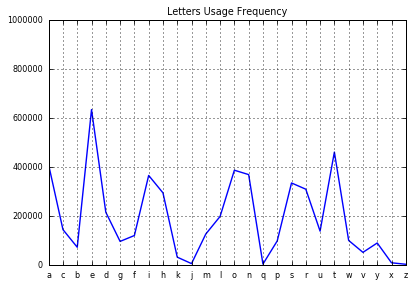

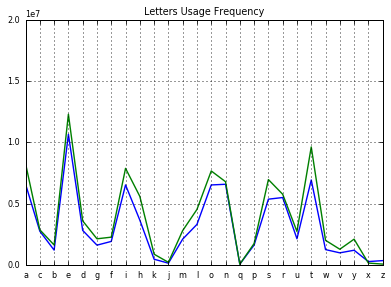

In [498]:
plot_char_frequency(CHR_big, lim=1e6)
plt.show()
plot_char_frequency(CHR_text8, lim=2e7)
plot_char_frequency(CHR_imdb, lim=2e7)
plt.grid()
plt.show()

#### Letter distribution 

Ordered by frequency

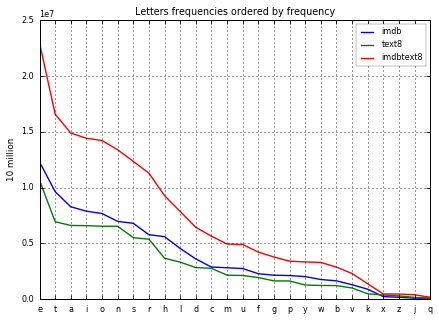

In [323]:
plt.figure(figsize=(7,5))
plt.plot(df_CHR_imdb['count'])
plt.plot(df_CHR_t8['count'])
plt.plot(df_CHR_db8['count'])
plt.legend(['imdb', 'text8', 'imdbtext8']);plt.grid()
plt.ylabel('10 million')
plt.title('Letters frequencies ordered by frequency')
plt.xticks(range(len(df_CHR_db8)), df_CHR_db8.char)
plt.savefig('../w2v-eval/img/cp-letter-freq0.png', dpi=300, bbox_inches='tight')

Ordered by alphabet

In [291]:
# dataframe
a = df_CHR_imdb.copy()
b = df_CHR_t8.copy()
c = df_CHR_db8.copy()
a = a.sort_values('char')
b = b.sort_values('char')
c = c.sort_values('char')

In [292]:
a.to_csv('data/corpus/stats/CHR-imdb-ALPHABETICALLY.csv', index=0)
b.to_csv('data/corpus/stats/CHR-text8-ALPHABETICALLY.csv', index=0)
c.to_csv('data/corpus/stats/CHR-imdbtext8-ALPHABETICALLY.csv', index=0)

In [293]:
a = pd.read_csv('data/corpus/stats/CHR-imdb-ALPHABETICALLY.csv')
b = pd.read_csv('data/corpus/stats/CHR-text8-ALPHABETICALLY.csv')
c = pd.read_csv('data/corpus/stats/CHR-imdbtext8-ALPHABETICALLY.csv')

In [328]:
import matplotlib.gridspec as gridspec

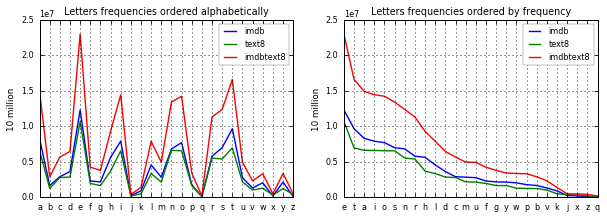

In [364]:
fig = plt.figure(figsize=(10, 7))
# create grid
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# add plots 
ax1.plot(a['count'])
ax1.plot(b['count'])
ax1.plot(c['count'])
ax1.legend(['imdb', 'text8', 'imdbtext8'])
ax1.set_xticks(range(len(a)))
ax1.set_xticklabels(a.char);
ax1.set_title('Letters frequencies ordered alphabetically')
ax1.set_ylabel('10 million')
ax1.grid()


ax2.plot(df_CHR_imdb['count'])
ax2.plot(df_CHR_t8['count'])
ax2.plot(df_CHR_db8['count'])
ax2.legend(['imdb', 'text8', 'imdbtext8'])
ax2.set_xticks(range(len(df_CHR_imdb)))
ax2.set_xticklabels(df_CHR_imdb.char)
ax2.set_ylabel('10 million')
ax2.set_title('Letters frequencies ordered by frequency')
ax2.grid()
plt.savefig('../w2v-eval/img/cp-letter-freq.png', dpi=300, bbox_inches='tight')

---

NEXT

---

# Analyzing Embeddings Accuracy

### Models vectors quality
First, parse the eval--.txt files (n the result folder) to extract the accuracy results of each model.

In [81]:
models_acc = {}
fldr = 'results/'
files = os.listdir(fldr)
for f in files:
    if f.startswith('eval') and f.endswith('.txt') and not f.startswith('eval1-imdb-') and not f.endswith('no-threshold.txt'):
        lines = open(fldr + f).readlines()
        for line in lines:
            if line.startswith('Questions seen / total:'):
                model_name = ''.join(f.split('-')[1:]).replace('.txt', '')
                results = line.split('total:')[-1].split()[:-1]
                models_acc[model_name] = results
                #print model_name, results

In [82]:
models_acc

{'googleNews': ['13190', '19544', '67.49'],
 'imdb': ['10505', '19544', '53.75'],
 'imdbtext8': ['12448', '19544', '63.69'],
 'text8': ['12268', '19544', '62.77']}

#### Convert as a dataframe

In [83]:
acc_df = pd.DataFrame.from_dict(models_acc, orient='index')
acc_df.columns = ['questions_seen','total_question','percentage_seen']
for c in acc_df:
    acc_df[c] = acc_df[c].apply(float)
del acc_df['total_question']
acc_df = acc_df.astype(float)
acc_df = acc_df.reindex(['googleNews', 'imdb', 'imdbtext8', 'text8'])

In [84]:
# questions seen
acc_df

,questions_seen,percentage_seen
googleNews,13190,67.49
imdb,10505,53.75
imdbtext8,12448,63.69
text8,12268,62.77


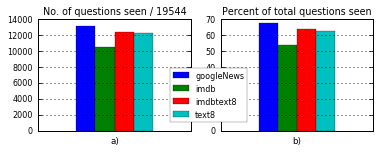

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

a = acc_df.T[:1].plot.bar(ax=axes[0], grid=True, legend=False, xticks=[], title='No. of questions seen / 19544')
a.set_xlabel('a)')
# a.set_ylim(0,20000)
# a.set_ylabel('No. of question seen / 19544')


b = acc_df.T[1:2].plot.bar(ax=axes[1], grid=True, xticks=[], title='Percent of total questions seen')
b.set_xlabel('b)')
# b.set_ylim(0,100)
b.legend(bbox_to_anchor= (0.2,0.6))

# b.set_ylabel('Accuracy %')
# fig.savefig('../w2v-eval/img/em-questions.png', dpi=300)

---

Parse the detailed topic accuracy of each models

In [86]:
topics = ('capital-common-countries', 
          'capital-world',
          'city-in-state',
          'currency',
          'family',
          'gram1-adjective-to-adverb',
          'gram2-opposite',
          'gram3-comparative',
          'gram4-superlative',
          'gram5-present-participle',
          'gram6-nationality-adjective',
          'gram7-past-tense',
          'gram8-plural',
          'gram9-plural-verbs'
         )
len(topics)

14

In [87]:
accuracies = {}
fldr = 'results/'
files = os.listdir(fldr)

for f in files:
    if f.startswith('eval') and f.endswith('.txt'):# and not f.startswith('eval1-imdb-'):
        fname = fldr + f
        model_name = ''.join(f.split('-')[1:]).replace('.txt', '')
        accuracies[model_name] = {}
        with open(fname) as f:
            try:
                header = next(f)
            except StopIteration as e: 
                print "File is empty"
            for line in f:
                if line.startswith(topics):
                    topic = line.split(':')[0]
                  
                    # ACCURACY TOP1:
                    acc_top = next(f)
                    acc_top = acc_top.split(':')[-1]
                    acc_top = acc_top.split('%')
                    acc_top = [s.strip() for s in acc_top]
                    # Total accuracy
                    tot_acc = next(f)
                    tot_acc = tot_acc.split('Total accuracy:')[-1].split('%')[:-1]
                    tot_acc = [s.strip() for s in tot_acc]
                    
                    accuracies[model_name][topic] = acc_top, tot_acc


#### Collect {model: {topic: accuracy}

In [88]:
topic_accurcies = {}
for k, v in accuracies.items():
    topic_accurcies[k] = {}
    for kk, vv in v.items():
        topic_accurcies[k][kk] = vv[1][0]

#### Convert to a dataframe

In [89]:
df = pd.DataFrame.from_dict(topic_accurcies, orient='index')
# df columns to float
for c in df:
    df[c] = df[c].apply(float)

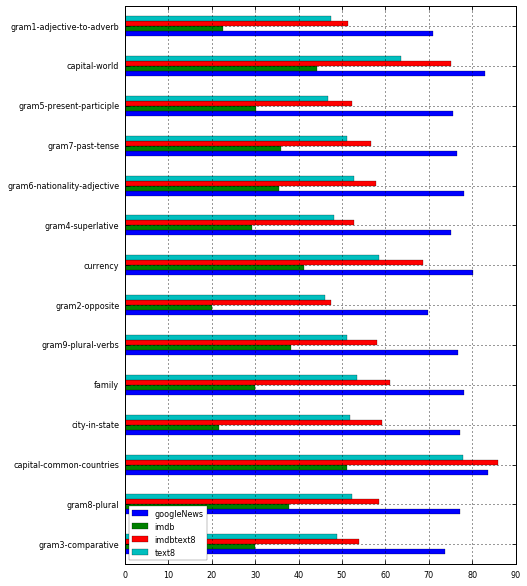

In [92]:
ax = df.T.plot.barh(figsize=(7,10), grid=True)
ax.legend(loc='lower left')
# plt.savefig('../w2v-eval/img/em-topics-acc.png', dpi=300, bbox_inches='tight')

#### Add OVERALL accuracy

In [98]:
import numpy as np
def comput_overall(df):
    return df.apply(np.sum, axis=1) / len(df.columns)

In [99]:
# add new columns (overall_acc) as the average accuracy of all topics for each model
df_overall = pd.DataFrame()
df_overall['OVERALL'] = np.round( comput_overall(df), decimals=2)

In [100]:
df_overall

,OVERALL
googleNews,76.85
imdb,33.41
imdbtext8,59.89
text8,53.60


#### append OVERALL accuracy

In [ ]:
acc_df['overall_acc'] = df_overall.OVERALL

In [ ]:
acc_df

Overall Embeddings Results

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

a = df.T.plot.box(ax=axes[0], title='a)   Scores of the 14 topics boxplot', grid=True)
a.set_ylim(10,100)
a.set_xticklabels(df.index, rotation=20)

c = df.T.plot.density(ax=axes[1], title='b)   Topic scores density', grid=True)

b = df_overall.plot.bar(ax=axes[2], legend=False, title='c)   Overall average score of all topics', grid=True)
b.set_ylim(10,100)
b.set_xticklabels(df_overall.index, rotation=20)

fig.savefig('../w2v-eval/img/em-overall.png', dpi=300)#, bbox_to_inch='tight')

Display scored accuracy for each topic 

In [ ]:
print 'MODEL: ACCURACY'
print '\tSCORE TOPIC'
for k, v in topic_accurcies.items():
    print k+':',
    tot = sum([float(vv) for kk, vv in v.items()])
    tot = '{:.2f}'.format(tot / 14)
    print tot
    for k, v in v.items():
        print '\t', v, k

#### Detailed accuracy (question seen and topic score)

In [ ]:
print '\ttot-acc [top-acc, (seen/question)] topic'
for k, v in accuracies.items():
    print k
    for k, v in v.items():
        print '\t', v[1][0], v[0], '', k

---

NEXT 

---

# Analyzing Sentiment Classifiers Accuracy

In [4]:
import json
with open('sentiment-results.json', 'r') as handle:
    parsed_dict = json.load(handle)

In [5]:
# read result file
sent_df = pd.DataFrame.from_dict(parsed_dict)#, orient='index')

parsing classifiers scores only (without pos / neg count)

In [7]:
score_dict = {}
for k, v in parsed_dict.items():
    print k
    score_dict[k] = {}
    for kk, vv in v.items():
        score_dict[k][kk] = vv[0]
        print '\t', kk, vv[0]

imdb-text8
	SGDClassifier 85.50%
	LinearSVC 89.12%
	Perceptron 80.11%
	LogisticRegressionCV 89.08%
	RandomForestClassifier 83.94%
imdb
	SGDClassifier 86.49%
	LinearSVC 89.20%
	Perceptron 84.29%
	LogisticRegressionCV 89.19%
	RandomForestClassifier 84.47%
text8
	SGDClassifier 75.44%
	LinearSVC 81.17%
	Perceptron 76.62%
	LogisticRegressionCV 81.22%
	RandomForestClassifier 74.26%
GoogleNews
	SGDClassifier 82.89%
	LinearSVC 86.14%
	Perceptron 78.94%
	LogisticRegressionCV 86.08%
	RandomForestClassifier 79.90%


parsing positive count only (without score and neg count)

In [8]:
pos_dict = {}
for k, v in parsed_dict.items():
    pos_dict[k] = {}
    for kk, vv in v.items():
        pos_dict[k][kk] = vv[1]

parsing negative count only (without score and neg count)

In [9]:
neg_dict = {}
for k, v in parsed_dict.items():
    neg_dict[k] = {}
    for kk, vv in v.items():
        neg_dict[k][kk] = vv[2]

In [10]:
# CLASSIFIERS score in a dataframe
clf_df = pd.DataFrame.from_dict(score_dict)#, orient='index')
clf_df = clf_df.replace('%', '', regex=True) # remove % sign 
clf_df = clf_df.astype(float) # make dataframe numeric data 

In [11]:
clf_df

,GoogleNews,imdb,imdb-text8,text8
LinearSVC,86.14,89.20,89.12,81.17
LogisticRegressionCV,86.08,89.19,89.08,81.22
Perceptron,78.94,84.29,80.11,76.62
RandomForestClassifier,79.90,84.47,83.94,74.26
SGDClassifier,82.89,86.49,85.50,75.44


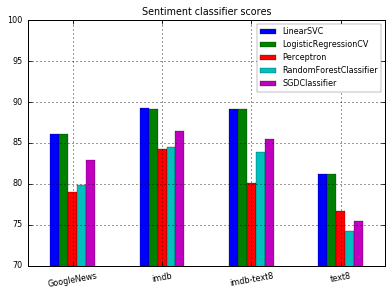

In [14]:
ax = clf_df.T.plot.bar(grid=True, title='Sentiment classifier scores', layout=(2,3))
ax.legend(loc='upper right')
ax.set_ylim(70,100)
ax.set_xticklabels(clf_df.columns,rotation=10);
# plt.savefig('../w2v-eval/img/sent-clfs-score-by-model.png', dpi=300, bbox_inches='tight')

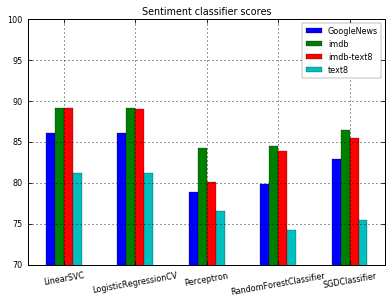

In [16]:
v = clf_df.plot.bar(grid=True, title='Sentiment classifier scores', layout=(2,3))
v.legend(loc='upper right')
v.set_ylim(70,100)
v.set_xticklabels(list(clf_df.index),rotation=10);
# plt.savefig('../w2v-eval/img/sent-clfs-score1.png', dpi=300, bbox_inches='tight')

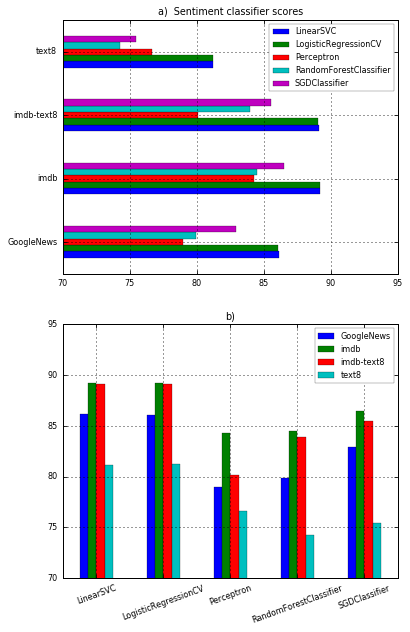

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(6,10))


m = clf_df.T.plot.barh(ax=axes[0], grid=True, title='a)  Sentiment classifier scores')
m.legend(loc='upper right')
m.set_xlim(70,95)
m.set_yticklabels(clf_df.columns,rotation=0);

v = clf_df.plot.bar(ax=axes[1], grid=True, title='b)')
v.legend(loc='upper right')
v.set_ylim(70,95)
v.set_xticklabels(list(clf_df.index),rotation=20);

# plt.savefig('../w2v-eval/img/sent-clfs-score3.png', dpi=300, bbox_inches='tight')

---

NEXT

---

# Putting all it Together

In [58]:
clf_all = clf_df.T.copy()

In [59]:
clf_all

,LinearSVC,LogisticRegressionCV,Perceptron,RandomForestClassifier,SGDClassifier
GoogleNews,86.14,86.08,78.94,79.90,82.89
imdb,89.20,89.19,84.29,84.47,86.49
imdb-text8,89.12,89.08,80.11,83.94,85.50
text8,81.17,81.22,76.62,74.26,75.44


In [63]:
clf_df.apply(np.average , axis=0)

GoogleNews    82.790
imdb          86.728
imdb-text8    85.550
text8         77.742
dtype: float64

In [64]:
clf_all['overall'] = clf_df.apply(np.average , axis=0)

In [45]:
print clf_df.apply(np.average , axis=0)

GoogleNews       82.790
imdb             86.728
imdb-text8       85.550
text8            77.742
overall_score       NaN
dtype: float64


In [54]:
# del clf_df['overall']

In [72]:
for x in clf_all['overall'].tolist():
    print '{:.2f}%'.format(x)

82.79%
86.73%
85.55%
77.74%


Show three things together:

1. model accuracy
2. average retrieval error
3. sentiment results

| Embeddings | vocab. size | AVG. retrieval err. | AVG. similarity acc. | AVG. sentiment score |
|:-----------|:------------|:-------------------:|:--------------------:|:--------------------:|
| imdb       | 53,195      |        1.46         |        33.41%        |      **86.73%**      |
| text8      | 71,291      |        4.62         |        53.60%        |        77.74%        |
| imdb-text8 | 94,158      |      **0.99**       |        59.89%        |        85.55%        |
| GoogleNews | **3M**      |        28.04        |      **76.85%**      |        82.79%        |

<center>Table: Summary on the final the results.</center>
